In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating a Pandas DataFrame from Excel File

In [2]:
data = pd.read_excel('data_2.xlsx', index_col='SKU')

### Contents of the DataFrame with SKU as the index

In [3]:
data.head()

,2019-08-01,2019-08-02,2019-08-03,2019-08-04,2019-08-05,2019-08-06,2019-08-07,2019-08-08,2019-08-09,2019-08-10,...,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31
SKU,,,,,,,,,,,,,,,,,,,,,
2527,1551,1613,1613,1532,1517,1441,1383,1424,1381,1340,...,1929,1948,1929,1987,2027,1926,1926,1849,1904,1828
3042,2240,2330,2423,2350,2374,2398,2278,2210,2232,2277,...,7096,7025,6955,6746,6881,6606,6804,6872,6872,7078
3086,891,909,936,889,880,906,870,879,844,852,...,829,829,812,788,788,772,811,803,763,763
3155,1628,1628,1563,1532,1563,1563,1532,1593,1513,1498,...,1719,1805,1895,1895,1990,2030,2050,2132,2111,2027
3166,369,354,343,340,330,337,350,343,340,340,...,335,328,325,319,316,319,329,336,349,352


### Transpose the DataFrame so that index is Columns represent the SKU and Dates represent the Index

In [4]:
data_tr = data.transpose()

In [5]:
data_tr.head()

SKU,2527,3042,3086,3155,3166,8272,9311,13159,13160,14011,...,PPAM05126,PPAM05156,PPAM06156,PPAM07156,PPAM08156,PPAM11156,PSTM01257,PSTM01457,WIM5011B,WIM51234
2019-08-01,1551,2240,891,1628,369,1034,597,57,49,6,...,29,28,15,79,93,2,22,14,92,2
2019-08-02,1613,2330,909,1628,354,1024,585,56,48,6,...,28,27,15,79,93,2,23,13,92,2
2019-08-03,1613,2423,936,1563,343,1055,608,57,48,6,...,29,28,15,75,89,2,24,12,91,2
2019-08-04,1532,2350,889,1532,340,1055,578,60,48,6,...,28,27,15,77,85,2,25,11,93,2
2019-08-05,1517,2374,880,1563,330,1055,566,58,46,6,...,28,28,15,80,88,2,24,10,95,2


### Extracting Year and Month columns from the DateTime Index and adding them to the DataFrame as columns

In [6]:
data_tr['year'] = pd.DatetimeIndex(data_tr.index).year
data_tr['month'] = pd.DatetimeIndex(data_tr.index).month

### Grouping the DataFrame to obtain total sales in year in 2019, 2020

In [7]:
yearly_data = data_tr.groupby(['year']).sum()

In [8]:
yearly_data

SKU,2527,3042,3086,3155,3166,8272,9311,13159,13160,14011,...,PPAM05156,PPAM06156,PPAM07156,PPAM08156,PPAM11156,PSTM01257,PSTM01457,WIM5011B,WIM51234,month
year,,,,,,,,,,,,,,,,,,,,,
2019,154884,374093,154602,261410,59934,160488,72136,9573,8000,918,...,7140,2793,13266,15847,306,3663,1612,11177,306,1530
2020,263695,860080,196156,441488,75300,150031,59727,11749,7687,1278,...,9514,2494,22090,40179,426,5265,2451,7925,426,854


### Grouping the DataFrame by Months to obtain total sale value of all SKUs by each Month

In [9]:
monthly_data = data_tr.groupby(['month']).sum()

In [10]:
monthly_data

SKU,2527,3042,3086,3155,3166,8272,9311,13159,13160,14011,...,PPAM05156,PPAM06156,PPAM07156,PPAM08156,PPAM11156,PSTM01257,PSTM01457,WIM5011B,WIM51234,year
month,,,,,,,,,,,,,,,,,,,,,
1,21853,79546,35670,75218,13990,16265,8532,2297,1248,186,...,1339,388,3281,3499,62,742,311,1567,62,62620
2,23170,78095,32029,61235,10517,14922,7193,2001,1154,174,...,1374,353,2601,4040,58,803,295,1430,58,58580
3,30956,92606,30827,72241,9587,18244,8971,1967,949,186,...,1928,330,3107,5874,62,725,320,1458,62,62620
4,38202,120947,25062,67543,12110,24042,9115,1800,845,180,...,1623,325,2990,7265,60,704,349,984,60,60600
5,44347,135342,22231,57518,9838,33069,10741,1447,1062,186,...,1332,409,3837,8075,62,797,390,904,62,62620
6,49341,157482,24184,53480,9076,22895,8341,1087,1261,180,...,943,363,3708,6403,60,796,342,766,60,60600
7,55826,196062,26153,54253,10182,20594,6834,1150,1168,186,...,975,326,2566,5023,62,698,444,816,62,62620
8,41702,69451,27412,46443,10720,31559,19045,1822,1485,186,...,925,478,2395,3151,62,682,323,2886,62,62589
9,36880,62415,31687,41922,10306,35877,17797,1990,1753,180,...,1211,580,2266,3021,60,772,305,2447,60,60570


### Obtaining total sales by each Month

In [11]:
total_monthly_sales = monthly_data.sum(axis=1)

### Obtaining Months from Highest to Lowest sales 

In [12]:
total_monthly_sales = total_monthly_sales.sort_values(ascending=False)

In [13]:
total_monthly_sales

month
3     20297190
12    19598859
1     19232719
4     19164072
7     18858391
5     18618567
6     18364131
10    18362697
2     18032037
11    18014585
9     17369901
8     16652793
dtype: int64

### From above data we can say that 

1. March, December and January are months with Highest sales

2. November, September and August are months with Lowest sales

### Creating Quarterly Data by grouping every 4 months

In [14]:
quarterly_data = monthly_data.copy() 

In [15]:
quarterly_data.index.rename('Qurater_Year')

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Qurater_Year')

In [16]:
quarterly_data = quarterly_data.groupby(quarterly_data.index // 4).sum()

In [17]:
quarterly_data.index.rename('Quarter Year', inplace=True)

### Quarterly Data

In [18]:
quarterly_data

SKU,2527,3042,3086,3155,3166,8272,9311,13159,13160,14011,...,PPAM05156,PPAM06156,PPAM07156,PPAM08156,PPAM11156,PSTM01257,PSTM01457,WIM5011B,WIM51234,year
Quarter Year,,,,,,,,,,,,,,,,,,,,,
0,75979,250247,98526,208694,34094,49431,24696,6265,3351,546,...,4641,1071,8989,13413,182,2270,926,4455,182,183820
1,187716,609833,97630,232794,41206,100600,35031,5484,4336,732,...,4873,1423,13101,26766,244,2995,1525,3470,244,246440
2,131080,286194,121158,189157,46086,137952,63134,7522,6728,732,...,5510,2252,9920,13035,244,2948,1293,9322,244,246318
3,23804,87899,33444,72253,13848,22536,9002,2051,1272,186,...,1630,541,3346,2812,62,715,319,1855,62,62589


### Sum of sales of all SKUs in the given timeline

In [19]:
cum_data = monthly_data.sum(axis=0)

In [20]:
cum_data.head()

SKU
2527     418579
3042    1234173
3086     350758
3155     702898
3166     135234
dtype: int64

### Plotting of cummulative sales of each SKU to find outliers

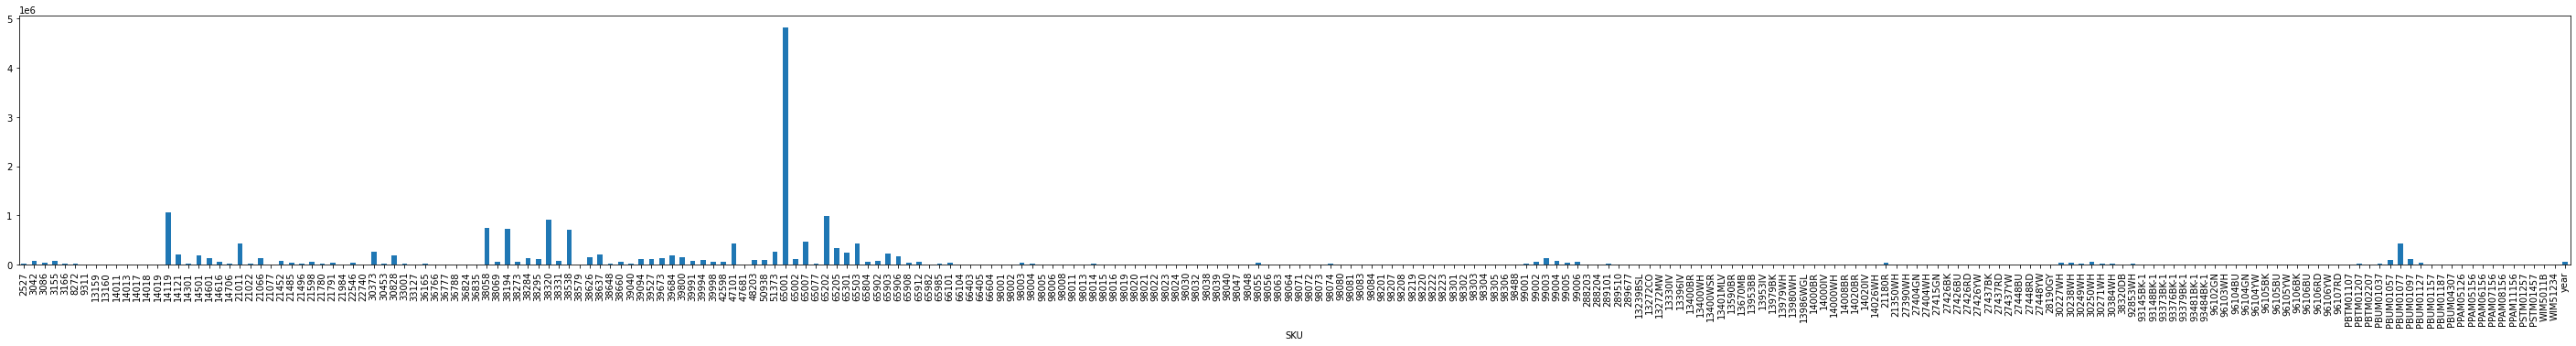

In [21]:
for i in range(12):
    fig = monthly_data.iloc[0].plot(kind='bar',figsize=(50,5), rot=90).get_figure()
    fig.savefig('month_'+str(i))

1. January
    <img src='month_0.png'>
2. February
    <img src='month_0.png'>
3. March
    <img src='month_0.png'>
4. April
    <img src='month_0.png'>
5. May
    <img src='month_0.png'>
6. June
    <img src='month_0.png'>
7. July
    <img src='month_0.png'>
8. August
    <img src='month_0.png'>
9. September
    <img src='month_0.png'>
10. October
    <img src='month_0.png'>
11. November
    <img src='month_0.png'>
12. December
    <img src='month_0.png'>

In [22]:
outliers = []
all_lists = []
for i in range(12):
    sorted_list = monthly_data.iloc[i].sort_values()
    sorted_list = sorted_list.reset_index()
    all_lists.append(sorted_list)
    sorted_list.columns
#     print(sorted_list)
    outliers.append([sorted_list['SKU'][0], sorted_list['SKU'][len(sorted_list)-1]])

In [23]:
outliers = pd.DataFrame(outliers)
outliers

,0,1
0,98201,65001
1,98222,65001
2,98201,65001
3,98220,65001
4,98222,65001
5,98222,65001
6,98201,65001
7,98201,65001
8,98201,65001
9,98220,65001


#### From the above data we can say that SKU-65001 is outlier among all the SKUs